In [1]:
import cv2
import numpy as np
import PIL.Image as Image
from IPython.display import display
import math

In [2]:
flower = cv2.imread('./image/Flower1.jpg')

In [3]:
flower.shape

(411, 636, 3)

In [4]:
flower_gray = cv2.cvtColor(flower,cv2.COLOR_BGR2GRAY)

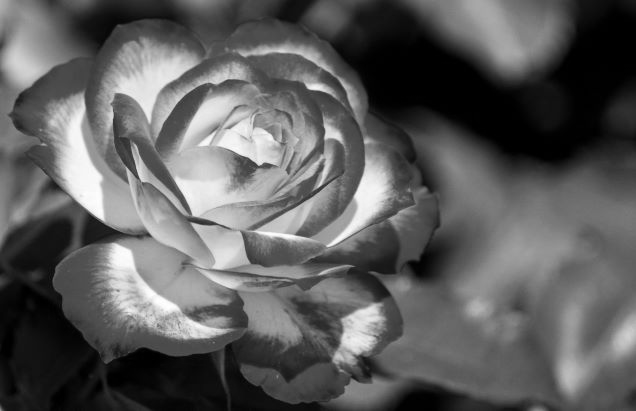

In [5]:
display(Image.fromarray(flower_gray))

In [6]:
flower_gray

array([[176, 173, 171, ...,  24,  24,  24],
       [175, 173, 170, ...,  24,  24,  24],
       [175, 173, 170, ...,  23,  23,  23],
       ...,
       [110,  78,  52, ...,  60,  58,  57],
       [128,  95,  67, ...,  62,  60,  59],
       [144, 110,  80, ...,  64,  63,  61]], dtype=uint8)

Loc Gaussian

In [7]:
filter_gaussian = np.array([(math.pow(math.exp(1),-1)/4.8976,math.pow(math.exp(1),-0.5)/4.8976,math.pow(math.exp(1),-1)/4.8976),
                   (math.pow(math.exp(1),-0.5)/4.8976,1/4.8976,math.pow(math.exp(1),-0.5)/4.8976),
                   (math.pow(math.exp(1),-1)/4.8976,math.pow(math.exp(1),-0.5)/4.8976,math.pow(math.exp(1),-1)/4.8976)])

In [8]:
filter_gaussian

array([[0.07511423, 0.12384242, 0.07511423],
       [0.12384242, 0.20418164, 0.12384242],
       [0.07511423, 0.12384242, 0.07511423]])

In [9]:
arr_gaussian = np.array(flower_gray)
arr_gaussian

array([[176, 173, 171, ...,  24,  24,  24],
       [175, 173, 170, ...,  24,  24,  24],
       [175, 173, 170, ...,  23,  23,  23],
       ...,
       [110,  78,  52, ...,  60,  58,  57],
       [128,  95,  67, ...,  62,  60,  59],
       [144, 110,  80, ...,  64,  63,  61]], dtype=uint8)

In [10]:
new_arr_gaussian = np.zeros((flower_gray.shape[0]+filter_gaussian.shape[0]-1,flower_gray.shape[1]+filter_gaussian.shape[1]-1))
for i in range(flower_gray.shape[0]):
    for j in range(flower_gray.shape[1]):
      new_arr_gaussian[i + int((filter_gaussian.shape[0]-1)/2), j + int((filter_gaussian.shape[1]-1)/2)] = flower_gray[i,j]
row = new_arr_gaussian.shape[0]
col = new_arr_gaussian.shape[1]
new_arr_gaussian[0:row,0:1] = new_arr_gaussian[0:row,1:2]
new_arr_gaussian[0:row,col-1:col] = new_arr_gaussian[0:row,col-2:col-1]
new_arr_gaussian[0:1,0:col] = new_arr_gaussian[1:2,0:col]
new_arr_gaussian[row-1:row,0:col] = new_arr_gaussian[row-2:row-1,0:col]
new_arr_gaussian

array([[176., 176., 173., ...,  24.,  24.,  24.],
       [176., 176., 173., ...,  24.,  24.,  24.],
       [175., 175., 173., ...,  24.,  24.,  24.],
       ...,
       [128., 128.,  95., ...,  60.,  59.,  59.],
       [144., 144., 110., ...,  63.,  61.,  61.],
       [144., 144., 110., ...,  63.,  61.,  61.]])

In [11]:
for i in range(flower_gray.shape[0]):
    for j in range(flower_gray.shape[1]):
      temp = new_arr_gaussian[i:i+filter_gaussian.shape[0],j:j+filter_gaussian.shape[1]]
      res = np.sum(temp*filter_gaussian)
      arr_gaussian[i,j] = res
arr_gaussian

array([[174, 173, 170, ...,  24,  24,  24],
       [174, 172, 170, ...,  23,  23,  23],
       [174, 172, 169, ...,  22,  22,  22],
       ...,
       [101,  80,  56, ...,  59,  58,  57],
       [118,  95,  69, ...,  61,  60,  59],
       [130, 107,  79, ...,  63,  62,  60]], dtype=uint8)

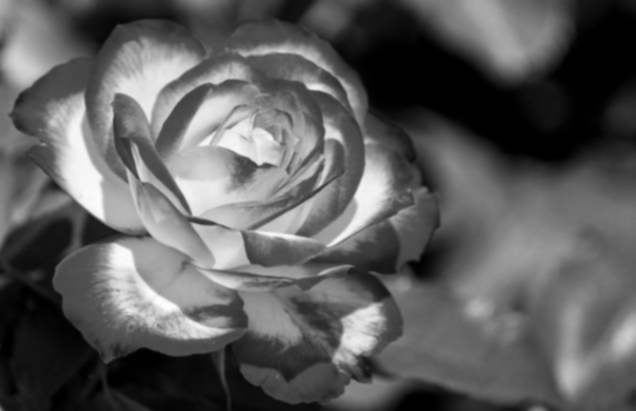

In [12]:
display(Image.fromarray(arr_gaussian))

Loc Laplace

In [13]:
filter_laplace = np.array([(0,-1,0),(-1,5,-1),(0,-1,0)])
new_arr_laplace = np.zeros((flower_gray.shape[0]+filter_laplace.shape[0]-1,flower_gray.shape[1]+filter_laplace.shape[1]-1))
for i in range(flower_gray.shape[0]):
    for j in range(flower_gray.shape[1]):
      new_arr_laplace[i + int((filter_laplace.shape[0]-1)/2), j + int((filter_laplace.shape[1]-1)/2)] = flower_gray[i,j]
row = new_arr_laplace.shape[0]
col = new_arr_laplace.shape[1]
new_arr_laplace[0:row,0:1] = new_arr_laplace[0:row,1:2]
new_arr_laplace[0:row,col-1:col] = new_arr_laplace[0:row,col-2:col-1]
new_arr_laplace[0:1,0:col] = new_arr_laplace[1:2,0:col]
new_arr_laplace[row-1:row,0:col] = new_arr_laplace[row-2:row-1,0:col]
new_arr_laplace

array([[176., 176., 173., ...,  24.,  24.,  24.],
       [176., 176., 173., ...,  24.,  24.,  24.],
       [175., 175., 173., ...,  24.,  24.,  24.],
       ...,
       [128., 128.,  95., ...,  60.,  59.,  59.],
       [144., 144., 110., ...,  63.,  61.,  61.],
       [144., 144., 110., ...,  63.,  61.,  61.]])

In [14]:
arr_laplace = np.array(flower_gray)
for i in range(flower_gray.shape[0]):
  for j in range(flower_gray.shape[1]):
    temp = new_arr_laplace[i:i+filter_laplace.shape[0],j:j+filter_laplace.shape[1]]
    value = np.sum(temp*filter_laplace)
    if value<0:
      arr_laplace[i,j] = 0
    else:
      arr_laplace[i,j] = value
arr_laplace

array([[180, 172, 173, ...,  24,  24,  24],
       [176, 174, 168, ...,  25,  25,  25],
       [178, 175, 171, ...,  24,  24,  24],
       ...,
       [143,  67,  34, ...,  63,  57,  56],
       [163,  92,  57, ...,  63,  58,  58],
       [194, 121,  82, ...,  66,  67,  61]], dtype=uint8)

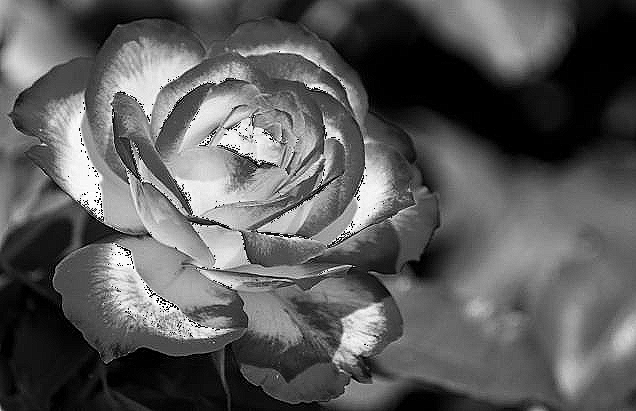

In [15]:
display(Image.fromarray(arr_laplace))

Loc sobel

In [16]:
filter_x = np.array([(-1,-2,-1),(0,0,0),(1,2,1)])
filter_y = np.array([(-1,0,1),(-2,0,2),(-1,0,1)])
new_arr_sobel = np.zeros((flower_gray.shape[0]+filter_x.shape[0]-1,flower_gray.shape[1]+filter_x.shape[1]-1))
for i in range(flower_gray.shape[0]):
    for j in range(flower_gray.shape[1]):
      new_arr_sobel[i + int((filter_x.shape[0]-1)/2), j + int((filter_x.shape[1]-1)/2)] = flower_gray[i,j]
row = new_arr_sobel.shape[0]
col = new_arr_sobel.shape[1]
new_arr_sobel[0:row,0:1] = new_arr_sobel[0:row,1:2]
new_arr_sobel[0:row,col-1:col] = new_arr_sobel[0:row,col-2:col-1]
new_arr_sobel[0:1,0:col] = new_arr_sobel[1:2,0:col]
new_arr_sobel[row-1:row,0:col] = new_arr_sobel[row-2:row-1,0:col]
new_arr_sobel

array([[176., 176., 173., ...,  24.,  24.,  24.],
       [176., 176., 173., ...,  24.,  24.,  24.],
       [175., 175., 173., ...,  24.,  24.,  24.],
       ...,
       [128., 128.,  95., ...,  60.,  59.,  59.],
       [144., 144., 110., ...,  63.,  61.,  61.],
       [144., 144., 110., ...,  63.,  61.,  61.]])

In [17]:
arr_sobel = np.array(flower_gray)
for i in range(flower_gray.shape[0]):
    for j in range(flower_gray.shape[1]):
      temp = new_arr_sobel[i:i+filter_x.shape[0],j:j+filter_x.shape[1]]
      res_x = np.sum(temp*filter_x)
      res_y = np.sum(temp*filter_y)
      value = res_x + res_y
      if value < 0 :
        arr_sobel[i,j] = 0
      else:
        arr_sobel[i,j] = value
arr_sobel

array([[ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       ...,
       [18,  0,  0, ..., 14,  8, 12],
       [ 2,  0,  0, ...,  6,  6, 12],
       [ 0,  0,  0, ...,  0,  0,  2]], dtype=uint8)

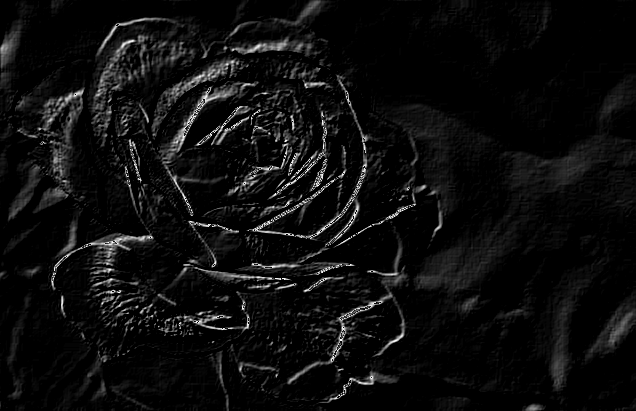

In [18]:
display(Image.fromarray(arr_sobel))

Laplacian of Gaussian (LoG)

In [19]:
filter_log = np.array([(0,1,0),(1,-4,1),(0,1,0)])
new_arr_log = np.array(new_arr_sobel)
arr_log = np.array(flower_gray)
for i in range(flower_gray.shape[0]):
    for j in range(flower_gray.shape[1]):
      temp = new_arr_log[i:i+filter_log.shape[0],j:j+filter_log.shape[1]]
      value = np.sum(temp*filter_log)
      if value < 0 :
        arr_log[i,j] = 0
      else:
        arr_log[i,j] = value
arr_log

array([[ 0,  1,  0, ...,  0,  0,  0],
       [ 0,  0,  2, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       ...,
       [ 0, 11, 18, ...,  0,  1,  1],
       [ 0,  3, 10, ...,  0,  2,  1],
       [ 0,  0,  0, ...,  0,  0,  0]], dtype=uint8)

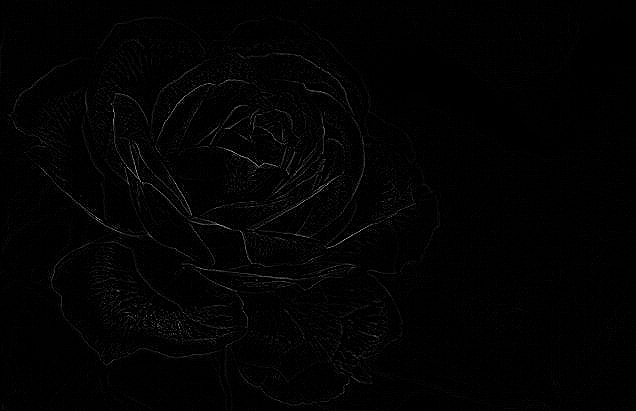

In [20]:
display(Image.fromarray(arr_log))